In [74]:
import torch
import torch.nn as nn

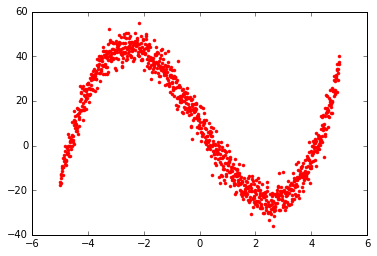

In [107]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

# Create Data
N = 1000

x = np.linspace(-5,5,N, dtype=np.float32)
target = x ** 3 - 20 * x + 10 + npr.normal(0, 4, x.shape[0])
target = np.array(target, dtype=np.float32)
plt.plot(x,target, 'r.')

In [108]:
data = torch.from_numpy(x)
data = torch.unsqueeze(data, dim=1)
# Normalize data
data = data/torch.max(data).item()

#target = np.array(target, dtype=np.float32)
target = torch.from_numpy(target)
target = torch.unsqueeze(target, dim=1)
# Normalize target data
#target = target/torch.max(target).item()

print("data", data.shape)
print("target", target.shape)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 1
hidden_size_1 = 8
hidden_size_2 = 6
hidden_size_3 = 4
num_classes = 1 # We are looking to know the unique value of y for each x

learning_rate = 0.003
num_epochs = 20000

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, hidden_size_3, num_classes):
        # To add attributes to already existing methods use "super()" 
        super(NeuralNet, self).__init__()
        
        # Define custom names for layers & nonlinearities
        self.fc1 = nn.Linear(input_size, hidden_size_1, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        
        self.relu = nn.ReLU()
        self.lrelu = nn.LeakyReLU()
        self.tanh = nn.Tanh()
        
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        
        self.fc3 = nn.Linear(hidden_size_2, hidden_size_3, bias=True)
        torch.nn.init.xavier_uniform_(self.fc3.weight)
        
        self.fc4 = nn.Linear(hidden_size_3, num_classes, bias=True)
        torch.nn.init.xavier_uniform_(self.fc4.weight)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        out = self.tanh(out)
        out = self.fc3(out)
        out = self.tanh(out)
        out = self.fc4(out)
        #out = self.tanh(out)
        return out

model = NeuralNet(input_size, hidden_size_1, hidden_size_2, hidden_size_3, num_classes).to(device)
        
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


# Train
for t in range(num_epochs):
    # Forward pass
    y_pred = model(data)
    
    # Compute and print loss
    #print("y_pred", y_pred.shape)
    #print("y", target.shape)
    #break
    # Unnormalie data
    y_pred = y_pred*torch.max(data).item()
    
    loss = criterion(y_pred, target)
    if t%999==0:
        print(t, loss.item())
    
    # Zero all calculated gradients
    optimizer.zero_grad()
    # Backward pass
    loss.backward()
    # Update gradients
    optimizer.step()
    
    


    

data torch.Size([1000, 1])
target torch.Size([1000, 1])
0 683.0865478515625
999 47.999393463134766
1998 35.251529693603516
2997 32.948238372802734
3996 30.879541397094727
4995 32.66292953491211
5994 30.61466407775879
6993 30.669757843017578
7992 29.318159103393555
8991 29.911413192749023
9990 28.538026809692383
10989 29.0671329498291
11988 28.78131103515625
12987 26.435497283935547
13986 26.057371139526367
14985 29.232545852661133
15984 27.50379753112793
16983 28.351600646972656
17982 27.10516929626465
18981 28.023393630981445
19980 26.832178115844727


x (1000, 1)
y (1000, 1)


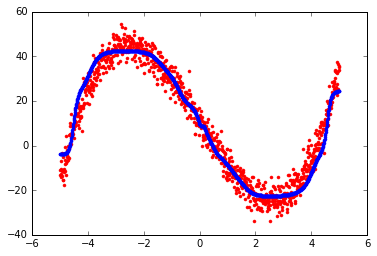

In [109]:
x = np.linspace(-5,5,N, dtype=np.float32)
target = x ** 3 - 20 * x + 10 + npr.normal(0, 4, x.shape[0])
plt.plot(x,target, 'r.')

y_pred = torch.squeeze(y_pred, 0)
y = y_pred.detach().numpy()
x = np.expand_dims(x, axis=-1)
print("x", x.shape)
print("y", y.shape)
plt.plot(x,y, 'b.')